In [93]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from PIL import Image
from PIL.ExifTags import TAGS
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [90]:
def plot_grid_images(samples, how_many = 20):
    def display_image(ax, image, label, prediction):
        ax.set_title(
            f"Label: {label}, Prediction: {prediction}", 
            fontsize = 10, color = 'red'
        )

        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        
    how_many = how_many * 3
    last = (samples.shape[0] // 3) * 3
    f, axarr  = plt.subplots(1, 3, figsize = (16, 16))
    for row, sample in samples.iterrows():
        image = Image.open(sample['path'])
        image = image.resize((456, 456))

        axis       = None
        label      = sample['label']
        preds      = sample['voting']
        
        if row % 3 == 0:
            axis = axarr[0]

        if row % 3 == 1:
            axis = axarr[1]

        if row % 3 == 2:
            axis = axarr[2]

        display_image(axis, image, label, preds)

        if row == how_many: break

        if row != 0 and row % 3 == 0:
            plt.show()
            f, axarr = plt.subplots(1, 3, figsize = (16, 16))

        if row == last: break

In [37]:
PATH_TO_BASE     = '../data/detect-targets-in-radar-signals/'
PATH_TO_TRAIN_FE = '../data/detect-targets-in-radar-signals/train_fe.csv'
PATH_TO_TEST_FE  = '../data/detect-targets-in-radar-signals/test_fe.csv'
PATH_TO_RESULTS  = '../oof/oof_rebuild.csv'

train_df = pd.read_csv(PATH_TO_TRAIN_FE)
test_df  = pd.read_csv(PATH_TO_TEST_FE)
results  = pd.read_csv(PATH_TO_RESULTS)

results  = pd.merge(train_df[['id', 'path', 'isNoisy']], results, on = 'id')
results['path'] = results['path'].apply(lambda x: "../" + x)

results.rename(columns = {'isNoisy': 'is_noisy'}, inplace = True)
test_df.rename(columns = {'isNoisy': 'is_noisy'}, inplace = True)
display(results)

id  \
0      ae36b992-7c8d-42c6-851f-51aca56285ec.png   
1      09c10b66-6d7e-4688-aa26-42b75cf5e1e9.png   
2      da6684f7-aabb-49e6-8bb0-c4e048e2dbba.png   
3      032dd82e-8776-476c-8d80-8e67d1d4909f.png   
4      e0a6d04b-18fa-4b15-89e2-6cb74fbcf437.png   
...                                         ...   
15495  b0b08f42-83f2-424d-bf29-85a1e55606fd.png   
15496  05bb64ec-cc16-4260-ad37-de5c4139ae39.png   
15497  f3417069-c8b0-4a59-a834-4f44932eab30.png   
15498  c65d1b1c-2c52-4c79-8b04-068798fa6734.png   
15499  f37772bb-fd16-440f-bd00-46ade3feda4f.png   

                                                    path  is_noisy  label  \
0      ../data/detect-targets-in-radar-signals/train/...         1      0   
1      ../data/detect-targets-in-radar-signals/train/...         0      0   
2      ../data/detect-targets-in-radar-signals/train/...         0      1   
3      ../data/detect-targets-in-radar-signals/train/...         0      4   
4      ../data/detect-targets-in-radar-signals/train/...         0      1   
...                                                  ...       ...    ...   
15495  ../data/detect-targets-in-radar-signals/train/...         0      0   
15496  ../data/detect-targets-in-radar-signals/train/...         0      3   
15497  ../data/detect-targets-in-radar-signals/train/...         0      4   
15498  ../data/detect-targets-in-radar-signals/train/...         0      2   
15499  ../data/detect-targets-in-radar-signals/train/...         0      4   

       Stage-0-GPU-0-Model-1  Stage-0-GPU-0-Model-2  Stage-0-GPU-1-Model-0  \
0                          0                      0                      0   
1                          0                      0                      0   
2                          0                      0                      0   
3                          4                      4                      3   
4                          1                      1                      1   
...                      ...                    ...                    ...   
15495                      0                      0                      0   
15496                      2                      3                      2   
15497                      4                      4                      4   
15498                      1                      0                      0   
15499                      3                      3                      3   

       Stage-0-GPU-1-Model-1  Stage-0-GPU-1-Model-2  
0                          0                      0  
1                          0                      0  
2                          0                      0  
3                          4                      3  
4                          1                      1  
...                      ...                    ...  
15495                      0                      0  
15496                      2                      2  
15497                      4                      4  
15498                      0                      0  
15499                      3                      3  

[15500 rows x 9 columns]

In [85]:
train_noisy = results[results['is_noisy'] == 1].reset_index(drop = True)
train_clear = results[results['is_noisy'] == 0].reset_index(drop = True)

test_noisy = test_df[test_df['is_noisy'] == 1].reset_index(drop = True)
test_clear = test_df[test_df['is_noisy'] == 0].reset_index(drop = True)

print('=' * 55)
print(f"No. of train noisy samples: {train_noisy.shape[0]}")
print(f"No. of train clear samples: {train_clear.shape[0]}")

print(f"No. of test noisy samples: {test_noisy.shape[0]}")
print(f"No. of test clear samples: {test_clear.shape[0]}")

models = [column for column in results.columns.tolist() if "Stage" in column]

print('=' * 55)
for model in models:
    print(f"[Noisy] Model {model}: {accuracy_score(noisy['label'], noisy[model])}")
    print(f"[Clear] Model {model}: {accuracy_score(clear['label'], clear[model])}")
    print(f"[All]   Model {model}: {accuracy_score(results['label'], results[model])}")
    print('=' * 55)

No. of train noisy samples: 4278
No. of train clear samples: 11222
No. of test noisy samples: 1500
No. of test clear samples: 4000
[Noisy] Model Stage-0-GPU-0-Model-1: 0.5212716222533894
[Clear] Model Stage-0-GPU-0-Model-1: 0.8070753876314383
[All]   Model Stage-0-GPU-0-Model-1: 0.7281935483870968
[Noisy] Model Stage-0-GPU-0-Model-2: 0.5196353436185134
[Clear] Model Stage-0-GPU-0-Model-2: 0.8113527000534664
[All]   Model Stage-0-GPU-0-Model-2: 0.7308387096774194
[Noisy] Model Stage-0-GPU-1-Model-0: 0.48153342683496964
[Clear] Model Stage-0-GPU-1-Model-0: 0.7985207627873819
[All]   Model Stage-0-GPU-1-Model-0: 0.7110322580645161
[Noisy] Model Stage-0-GPU-1-Model-1: 0.5409069658719028
[Clear] Model Stage-0-GPU-1-Model-1: 0.8242737479950099
[All]   Model Stage-0-GPU-1-Model-1: 0.7460645161290322
[Noisy] Model Stage-0-GPU-1-Model-2: 0.49251986909770923
[Clear] Model Stage-0-GPU-1-Model-2: 0.7747282124398502
[All]   Model Stage-0-GPU-1-Model-2: 0.6968387096774193


In [98]:
oof    = results[columns].values
labels = results['label'].values

votes = []
voting_wrong, all_wrong, very_wrong = [], [], []
for i in range(oof.shape[0]):
    values, counts = np.unique(oof[i], return_counts = True)
    index = np.argmax(counts)
    votes.append(values[index])
    
    if labels[i] not in oof[i] and \
        labels[i] + 1 not in oof[i] and \
         labels[i] - 1 not in oof[i]:
          very_wrong.append(True)
    else:
          very_wrong.append(False)
            
    if labels[i] not in oof[i]:
        all_wrong.append(True)
    else:
        all_wrong.append(False)
            
    if labels[i] != values[index]:
        voting_wrong.append(True)
    else: 
        voting_wrong.append(False)

results['voting']       = votes
results['voting_wrong'] = voting_wrong
results['all_wrong']    = all_wrong
results['very_wrong']   = very_wrong
          
# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results['voting'], return_counts = True))
# plt.title("Predictions Distributions")
# plt.show()

# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results['label'], return_counts = True))
# plt.title("Label Distributions")
# plt.show()

R = lambda x: np.round(x, 3)
print(f"Voting Accuracy: {accuracy_score(results['label'], results['voting'])}")
      
voting_wrong_samples       = results[results['voting_wrong'] == 1].reset_index(drop = True)
voting_wrong_noisy_samples = results[(results['voting_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
voting_wrong_clear_samples = results[(results['voting_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

voting_good_samples       = results[results['voting_wrong'] == 0].reset_index(drop = True)
voting_good_noisy_samples = results[(results['voting_wrong'] == 0) & (results['is_noisy'] == 1)].reset_index(drop = True)      
voting_good_clear_samples = results[(results['voting_wrong'] == 0) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"Voting Wrong: {voting_wrong_samples.shape[0]}  ({R(voting_wrong_samples.shape[0] / results.shape[0])})  -> Noisy: {voting_wrong_noisy_samples.shape[0]} ({R(voting_wrong_noisy_samples.shape[0] / voting_wrong_samples.shape[0])}) -> Clear: {voting_wrong_clear_samples.shape[0]} ({R(voting_wrong_clear_samples.shape[0] / voting_wrong_samples.shape[0])})")
print(f"Voting Good:  {voting_good_samples.shape[0]} ({R(voting_good_samples.shape[0] / results.shape[0])})  -> Noisy: {voting_good_noisy_samples.shape[0]} ({R(voting_good_noisy_samples.shape[0] / voting_good_samples.shape[0])}) -> Clear: {voting_good_clear_samples.shape[0]} ({R(voting_good_clear_samples.shape[0] / voting_good_samples.shape[0])})")

all_wrong_samples       = results[results['all_wrong'] == 1].reset_index(drop = True)
all_wrong_noisy_samples = results[(results['all_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
all_wrong_clear_samples = results[(results['all_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"All    Wrong: {all_wrong_samples.shape[0]}  ({R(all_wrong_samples.shape[0] / results.shape[0])}) -> Noisy: {all_wrong_noisy_samples.shape[0]} ({R(all_wrong_noisy_samples.shape[0] / all_wrong_samples.shape[0])}) -> Clear: {all_wrong_clear_samples.shape[0]} ({R(all_wrong_clear_samples.shape[0] / all_wrong_samples.shape[0])})")

      
very_wrong_samples       = results[results['very_wrong'] == 1].reset_index(drop = True)
very_wrong_noisy_samples = results[(results['very_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
very_wrong_clear_samples = results[(results['very_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"Very   Wrong: {very_wrong_samples.shape[0]}   ({R(very_wrong_samples.shape[0] / results.shape[0])}) -> Noisy: {very_wrong_noisy_samples.shape[0]}  ({R(very_wrong_noisy_samples.shape[0] / very_wrong_samples.shape[0])}) -> Clear: {very_wrong_clear_samples.shape[0]}  ({R(very_wrong_clear_samples.shape[0] / very_wrong_samples.shape[0])})")
   
# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results[results['very_wrong'] == 1]['voting'], return_counts = True))
# plt.title("Predictions Distributions")
# plt.show()

# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results[results['very_wrong'] == 1]['label'], return_counts = True))
# plt.title("Label Distributions")
# plt.show()
      
# display(results)

results['path'] = results['id'].apply(lambda x: os.path.join('data/detect-targets-in-radar-signals/', 'train', x))
results.to_csv('error_analysis.csv')

Voting Accuracy: 0.7495483870967742
Voting Wrong: 3882  (0.25)  -> Noisy: 1945 (0.501) -> Clear: 1937 (0.499)
Voting Good:  11618 (0.75)  -> Noisy: 2333 (0.201) -> Clear: 9285 (0.799)
All    Wrong: 2377  (0.153) -> Noisy: 1291 (0.543) -> Clear: 1086 (0.457)
Very   Wrong: 667   (0.043) -> Noisy: 498  (0.747) -> Clear: 169  (0.253)


============================== Label: 0 ==============================






============================== Label: 1 ==============================


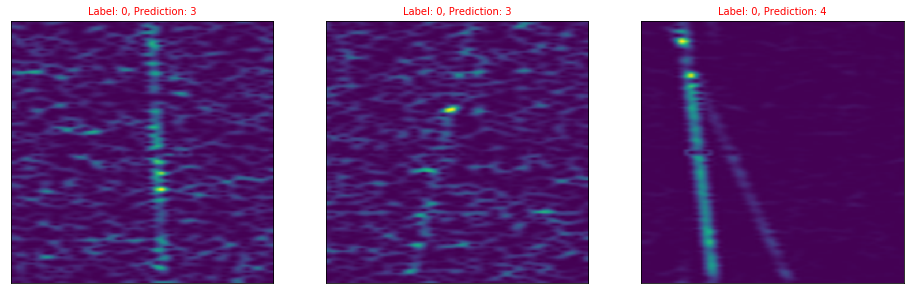

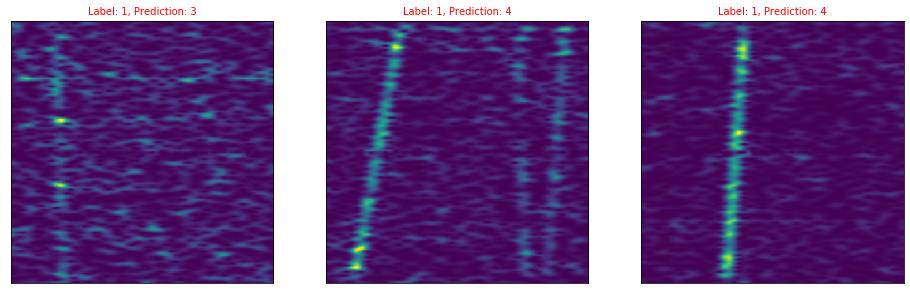

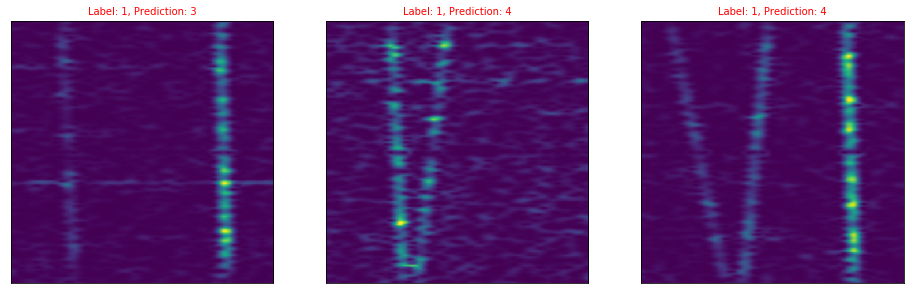

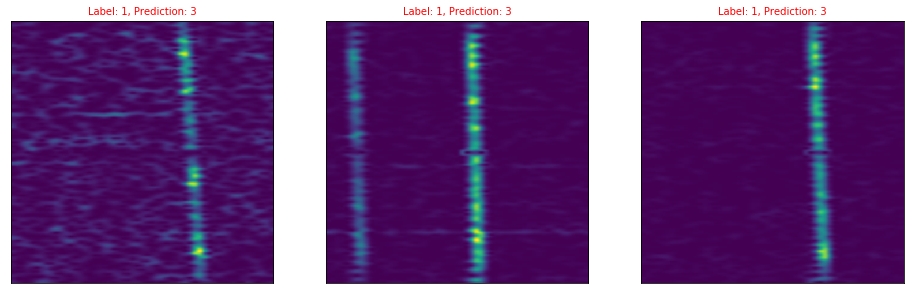







============================== Label: 2 ==============================


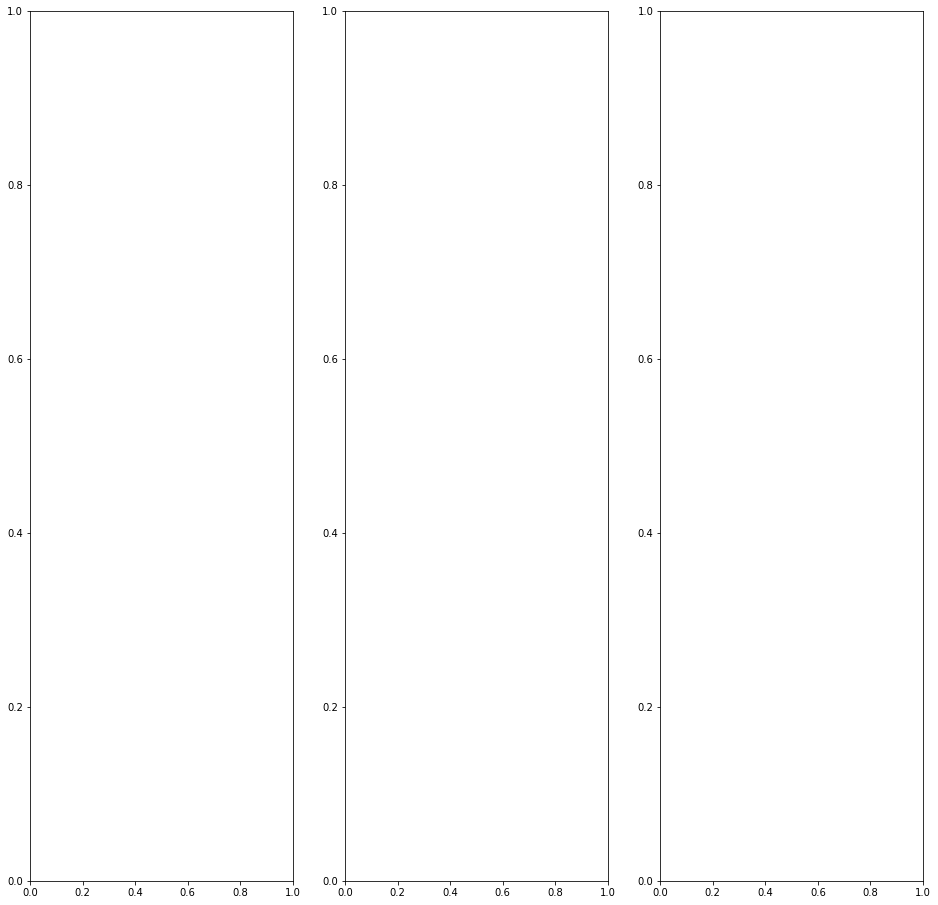

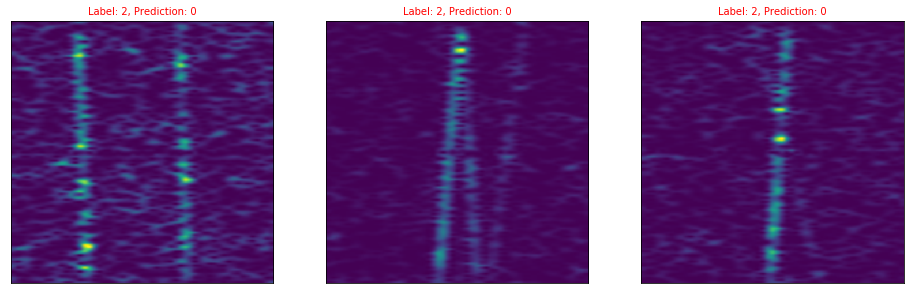

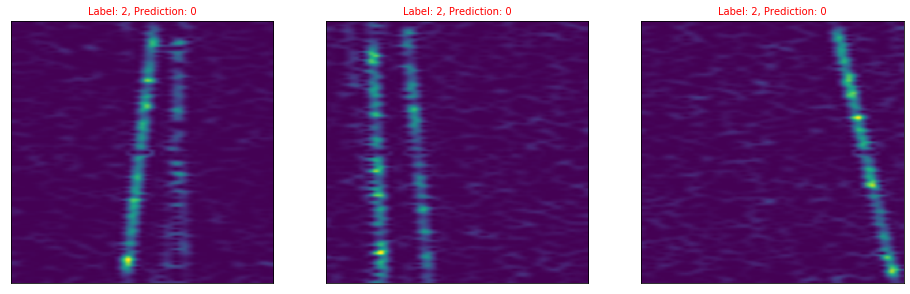

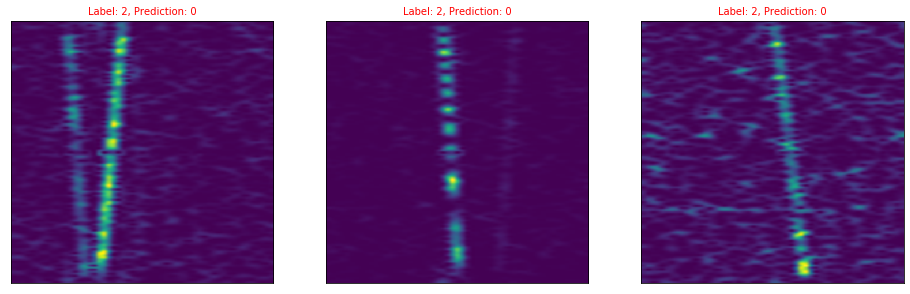

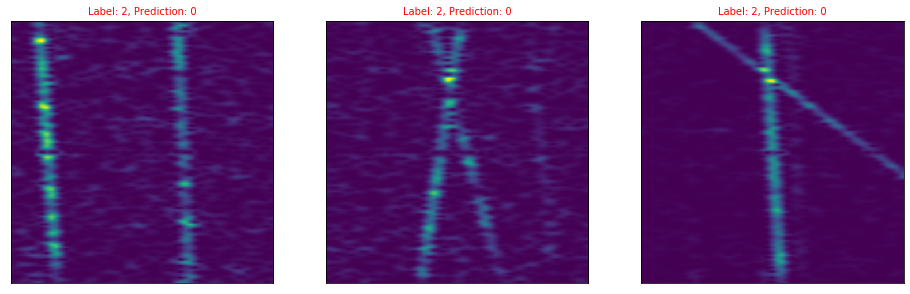

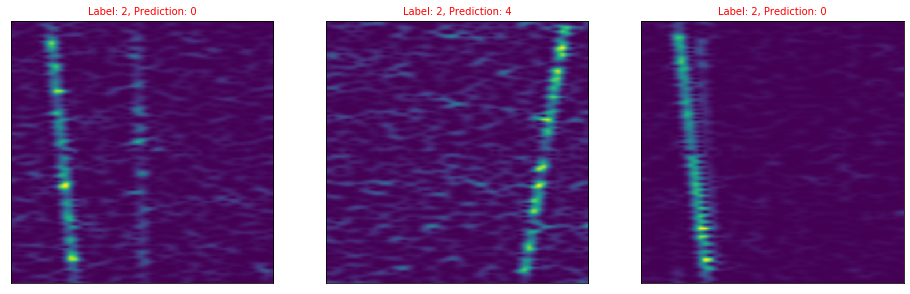

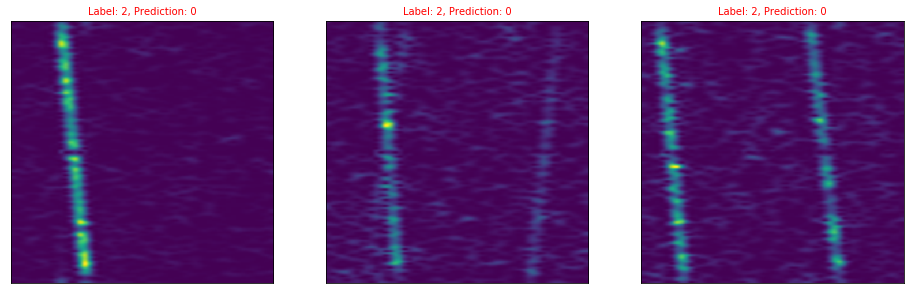

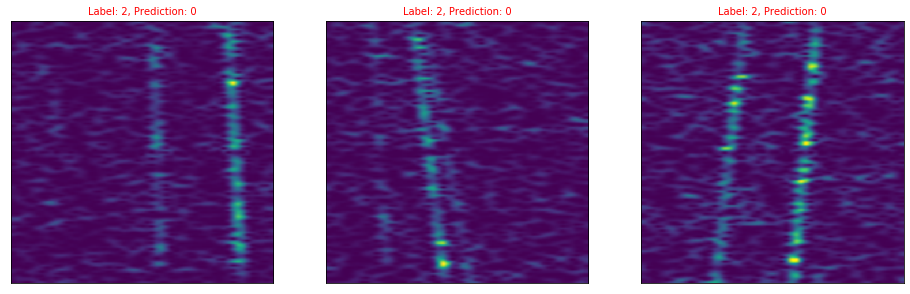

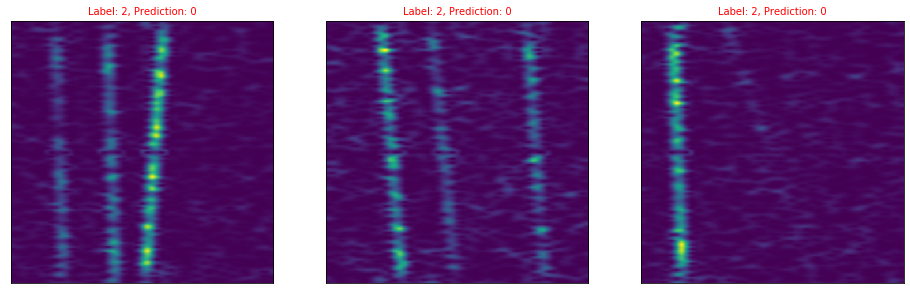

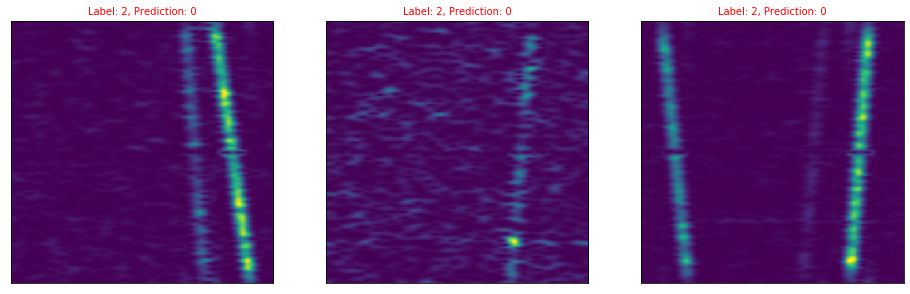







============================== Label: 3 ==============================


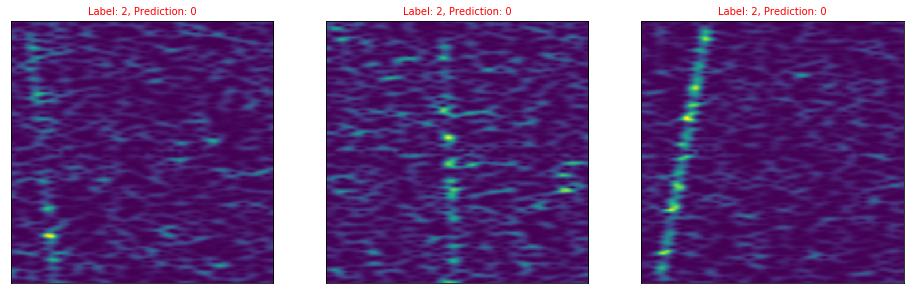

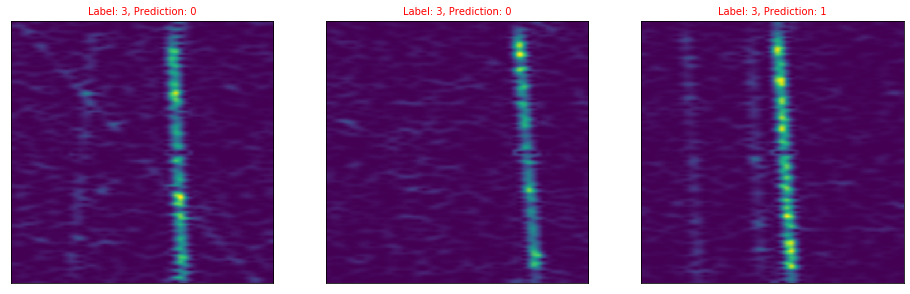

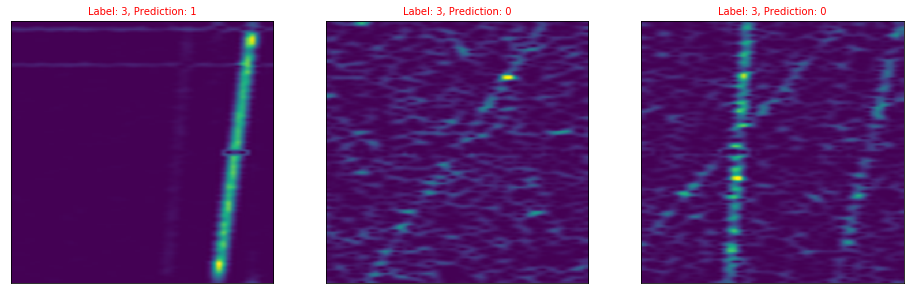

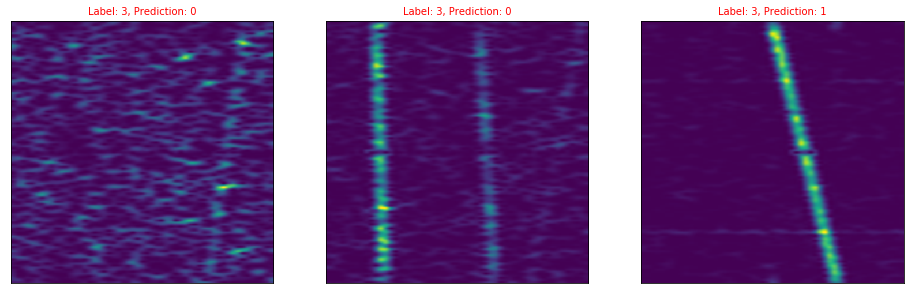

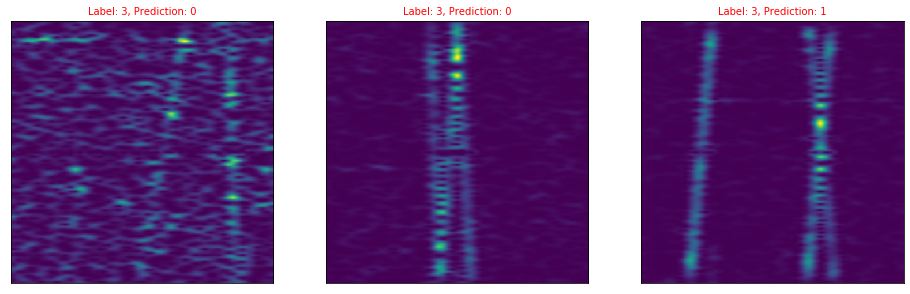

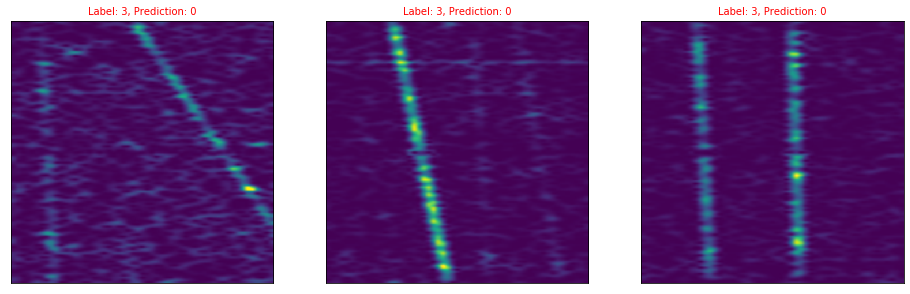

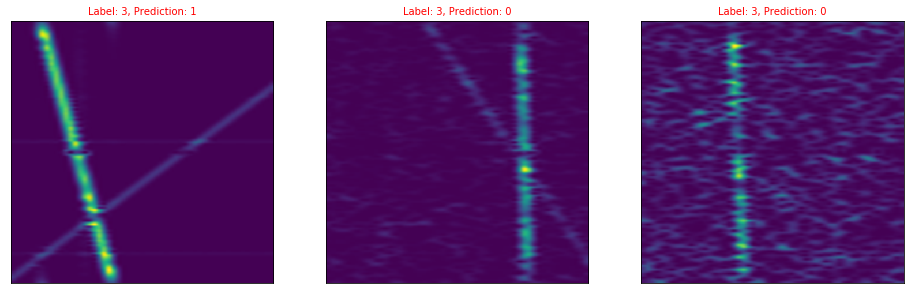

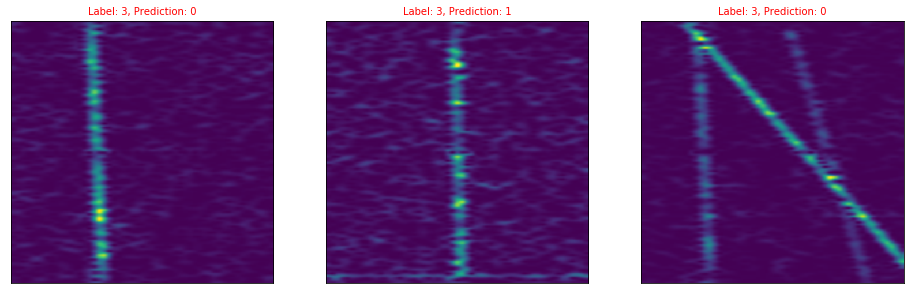

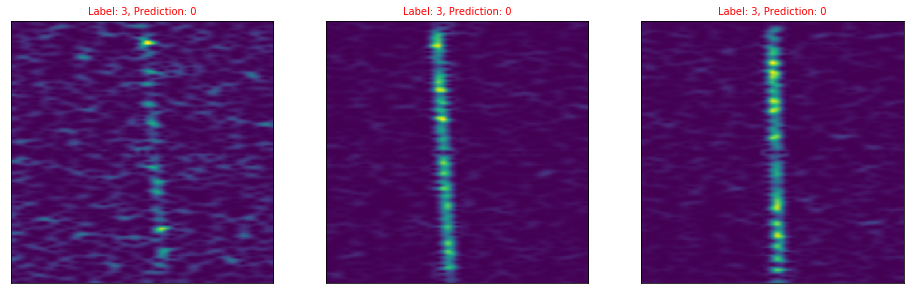

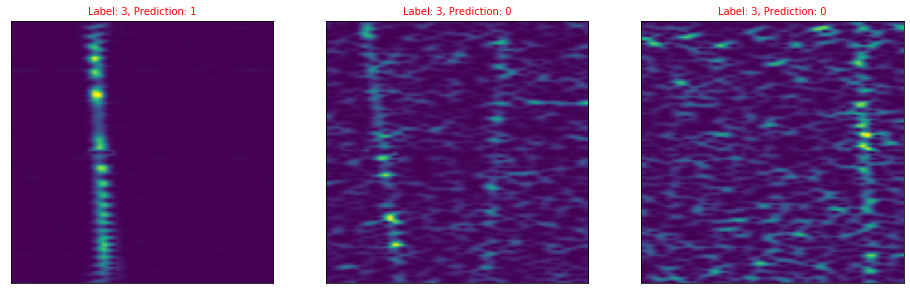







============================== Label: 4 ==============================


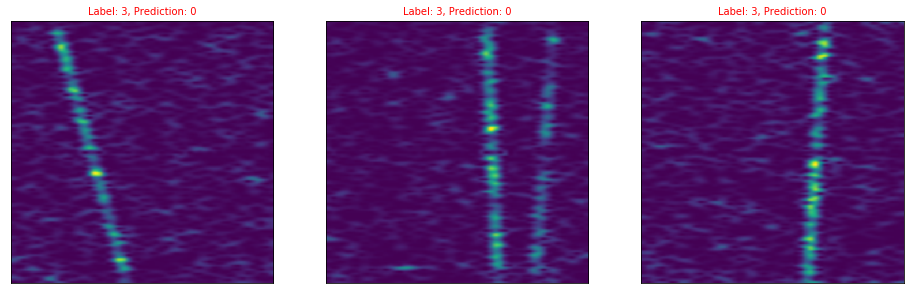

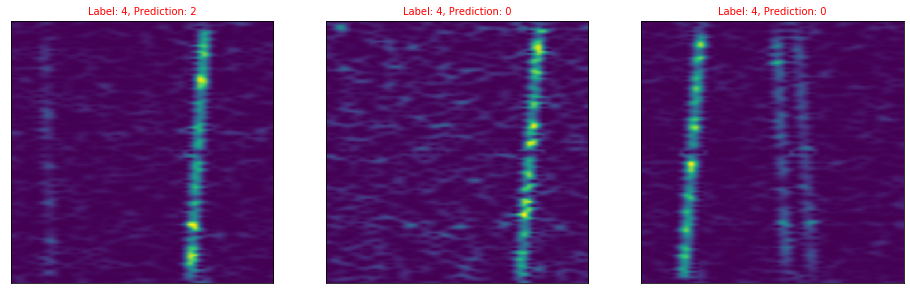

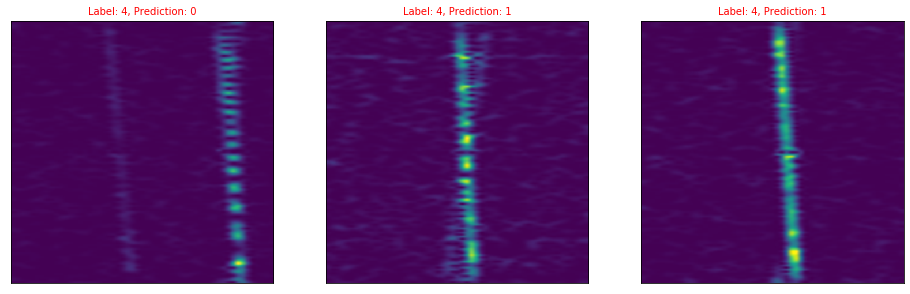

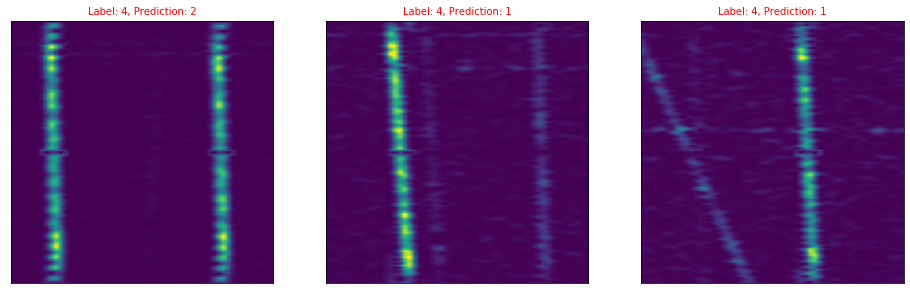

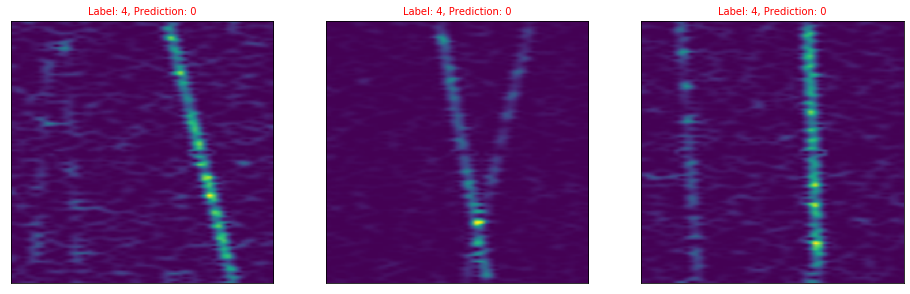

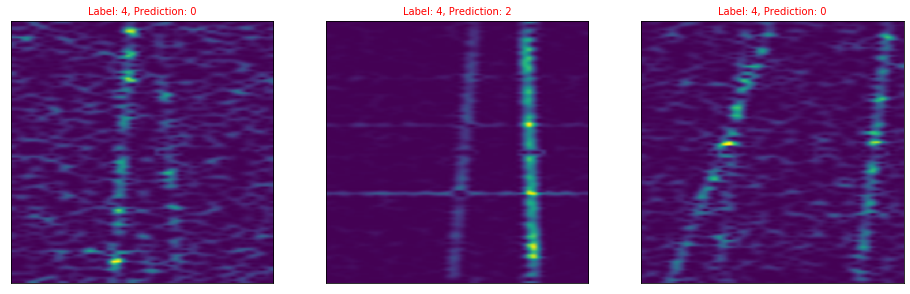

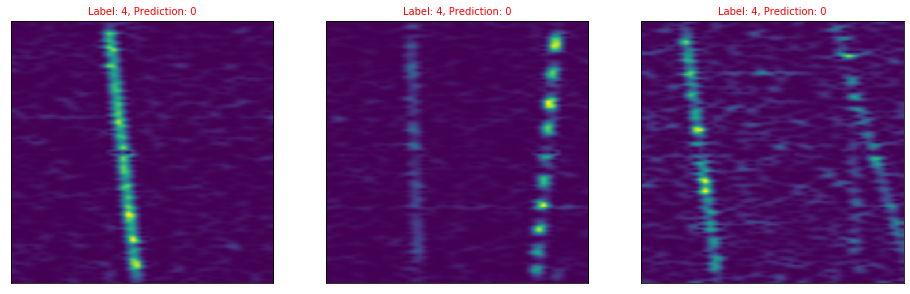

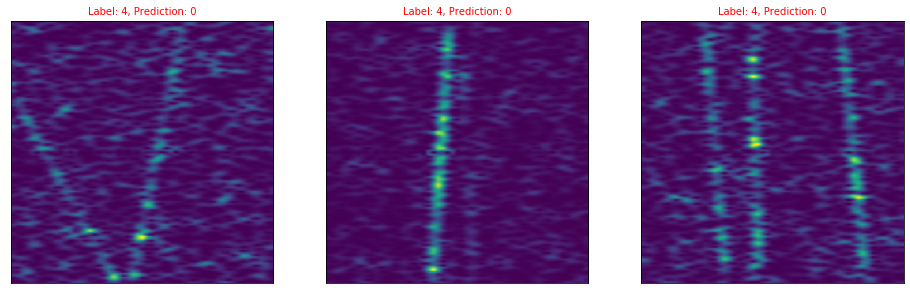

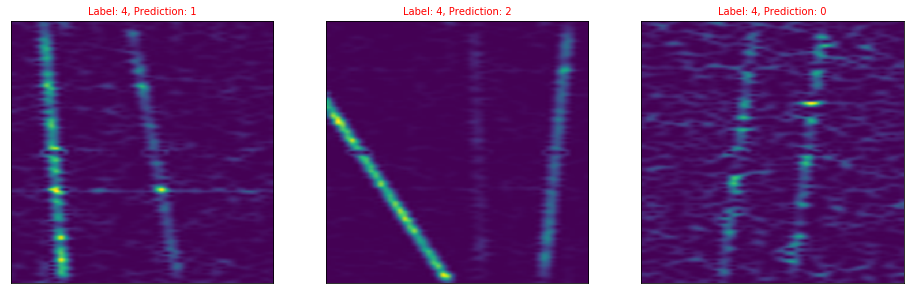

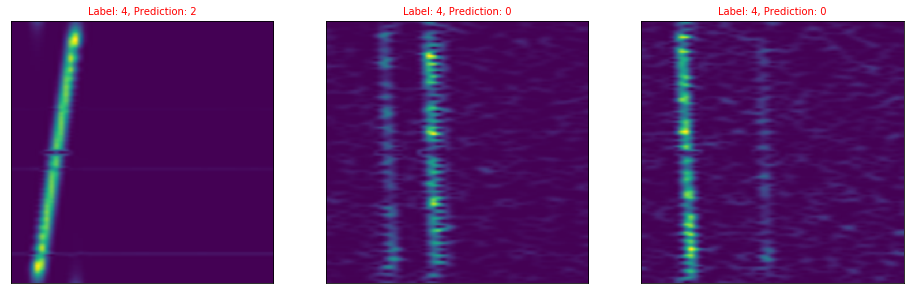

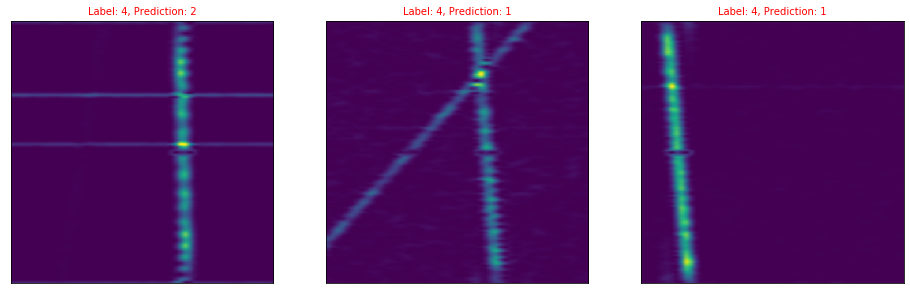

In [91]:
for group in very_wrong_samples.groupby('label'):
    print(30 * '=' + f' Label: {group[0]} ' + 30 * '=')
    group_copy = group[1].reset_index(drop = True)
    plot_grid_images(group_copy, 10)
    print('\n\n\n\n\n')

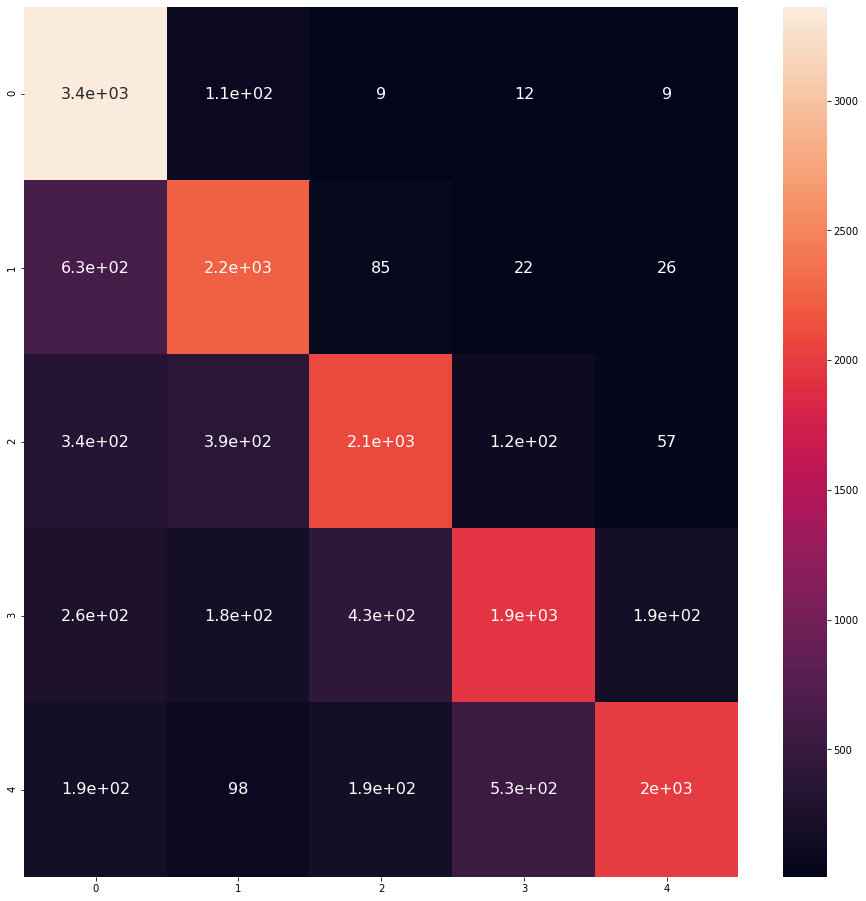

In [94]:
cm = pd.DataFrame(confusion_matrix(results['label'], results['voting']))
plt.figure(figsize = (16, 16))
sn.heatmap(cm, annot = True, annot_kws = {"size": 16})
plt.show()